# Week 13
# GroupBy Mechanics

Many data processing follows a **split-apply-combine** process. For example, you may want to do the following operations to analyze a dataset about sales:
1. What is the total revenue of each day?
2. What is the total sales of each product?
3. How much has each client purchased in total?

These operations all requires that you split the data into groups, and then apply certain calculations to each of the groups, and finally combine all results into a new table. In Pandas this is mostly done with `groupby()` function.

**Readings**
- Textbook, Chapter 10

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# An example:
df = pd.DataFrame({'Name' : ['Alice', 'Bob', 'Charlie', 'Alice', 'Bob', 'Charlie'],
                   'Course' : ['Programming', 'Programming', 'Programming','Data Structure', 'Data Structure','Data Structure',],
                   'Semester': ['Spring 2019', 'Fall 2019', 'Fall 2019', 'Spring 2019', 'Fall 2019', 'Spring 2019'],
                   'Homework' : np.random.randint(60, 100, size=6),
                   'Exam' : np.random.randint(60, 100, size=6)})
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,73,62
1,Bob,Programming,Fall 2019,92,77
2,Charlie,Programming,Fall 2019,93,83
3,Alice,Data Structure,Spring 2019,75,61
4,Bob,Data Structure,Fall 2019,92,76
5,Charlie,Data Structure,Spring 2019,95,81


In [3]:
# Split exam scores according to name
groups = df['Exam'].groupby(df['Name'])

groups

In [4]:
# Apply mean() function to find the average value for each group
means = groups.mean()

means

Name
Alice      61.5
Bob        76.5
Charlie    82.0
Name: Exam, dtype: float64

We obtain a **data series**. It can be converted to a data frame by `to_frame()` method.

In [5]:
# A common practice is to convert the results to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

,Average Exam Score
Name,
Alice,61.5
Bob,76.5
Charlie,82.0


In [6]:
# Put all operations in one statement
df_means = df['Exam'].groupby(df['Name']).mean().to_frame(name="Average Exam Score")

df_means

,Average Exam Score
Name,
Alice,61.5
Bob,76.5
Charlie,82.0


In [7]:
# Exercise: Find the average homework score and exam score for each course

df[['Homework', 'Exam']].groupby(df['Course']).mean()
# The result is already a data frame because they come from more than 1 columns.

,Homework,Exam
Course,,
Data Structure,87.333333,72.666667
Programming,86.000000,74.000000


## Split Data with Multiple Columns

We can use more than one column as keys to split data into groups.

In [8]:
# Split the exam scores according to both course name and semester.
groups = df['Exam'].groupby([df['Course'], df['Semester']])

In [9]:
# Calculate the average score
means = groups.mean()

means

Course          Semester   
Data Structure  Fall 2019      76.0
                Spring 2019    71.0
Programming     Fall 2019      80.0
                Spring 2019    62.0
Name: Exam, dtype: float64

In [10]:
groups2 = df['Exam'].groupby([df['Semester'], df['Course']])
means2 = groups2.mean()
means2

Semester     Course        
Fall 2019    Data Structure    76.0
             Programming       80.0
Spring 2019  Data Structure    71.0
             Programming       62.0
Name: Exam, dtype: float64

In [11]:
# Convert the result to a data frame
df_means = means.to_frame(name='Average Exam Score')

df_means

Average Exam Score
Course         Semester                       
Data Structure Fall 2019                  76.0
               Spring 2019                71.0
Programming    Fall 2019                  80.0
               Spring 2019                62.0

`means` is a data series with **hierarchical indexing**. It can be converted to a data frame using `unstack()`.

In [16]:
means.index

MultiIndex([('Data Structure',   'Fall 2019'),
            ('Data Structure', 'Spring 2019'),
            (   'Programming',   'Fall 2019'),
            (   'Programming', 'Spring 2019')],
           names=['Course', 'Semester'])

In [12]:
means.unstack() # unstack() converts a data series with multiple index into a data frame

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,76.0,71.0
Programming,80.0,62.0


We can specify which index to be unstacked.

In [13]:
means.unstack(level=0)

Course,Data Structure,Programming
Semester,,
Fall 2019,76.0,80.0
Spring 2019,71.0,62.0


In [14]:
means.unstack(level=1)

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,76.0,71.0
Programming,80.0,62.0


In [20]:
# Exercise:
# Using one statement, create the above data frame directly from df.

df['Exam'].groupby([df['Course'], df['Semester']]).mean().unstack()

Semester,Fall 2019,Spring 2019
Course,,
Data Structure,68.0,86.5
Programming,74.0,89.0


We can split the entire data set instead of one column.

In [15]:
df.groupby([df['Course'], df['Semester']]).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        92.0  76.0
               Spring 2019      85.0  71.0
Programming    Fall 2019        92.5  80.0
               Spring 2019      73.0  62.0

In [22]:
# Frequently the grouping information is found in the same data frame as the data 
# you want to work on. In that case, simply put column names as the keys:
df.groupby(['Course', 'Semester']).mean()

Homework  Exam
Course         Semester                   
Data Structure Fall 2019        87.0  68.0
               Spring 2019      74.0  86.5
Programming    Fall 2019        77.5  74.0
               Spring 2019      72.0  89.0

Besides `mean()`, there are several other functions we can apply to the groups. See [this article](https://cmdlinetips.com/2019/10/pandas-groupby-13-functions-to-aggregate/).

In [26]:
# Exercise:
# Use `size()` method to find the number of students for each course 
# in each semester

# df.groupby(['Course', 'Semester']).size().to_frame(name='Number of Students')
df.groupby(['Course', 'Semester']).count() # Show the number of values in each column

Name  Homework  Exam
Course         Semester                         
Data Structure Fall 2019       1         1     1
               Spring 2019     2         2     2
Programming    Fall 2019       2         2     2
               Spring 2019     1         1     1

## Iterating Over Groups

The GroupBy object support iteration, providing a sequence of 2-tuples containing the group name along with the data.

In [16]:
# Show the content of each group.
groups = df.groupby('Name')

for name, group in groups:
    print("Name:", name)
    print("Shape:", group.shape)
    print(group)

Name: Alice
Shape: (2, 5)
    Name          Course     Semester  Homework  Exam
0  Alice     Programming  Spring 2019        73    62
3  Alice  Data Structure  Spring 2019        75    61
Name: Bob
Shape: (2, 5)
  Name          Course   Semester  Homework  Exam
1  Bob     Programming  Fall 2019        92    77
4  Bob  Data Structure  Fall 2019        92    76
Name: Charlie
Shape: (2, 5)
      Name          Course     Semester  Homework  Exam
2  Charlie     Programming    Fall 2019        93    83
5  Charlie  Data Structure  Spring 2019        95    81


**Syntactic sugar**: It is simpler to use the following statement for selecting columns for groupby()

In [28]:
df.groupby('Name')['Exam'].mean()

Name
Alice      82.0
Bob        65.5
Charlie    91.5
Name: Exam, dtype: float64

In [29]:
# The standard statement
df['Exam'].groupby(df['Name']).mean()

Name
Alice      82.0
Bob        65.5
Charlie    91.5
Name: Exam, dtype: float64

In [31]:
# The following statement does not work because 
# 'Name' is not a column in df['Exam']

# df['Exam'].groupby('Name').mean() # This is a mistake

In [32]:
# Exercise:
# Use the simplified groupby expression to find the average homework scores of each semester.

df.groupby('Semester')['Homework'].mean()

Semester
Fall 2019      80.666667
Spring 2019    73.333333
Name: Homework, dtype: float64

## **Grouping with dictionary**
We can use a seperate dictionary to decide the groups.

In [17]:
df

,Name,Course,Semester,Homework,Exam
0,Alice,Programming,Spring 2019,73,62
1,Bob,Programming,Fall 2019,92,77
2,Charlie,Programming,Fall 2019,93,83
3,Alice,Data Structure,Spring 2019,75,61
4,Bob,Data Structure,Fall 2019,92,76
5,Charlie,Data Structure,Spring 2019,95,81


In [18]:
genders = {
    "Alice": "Female",
    "Bob": "Male",
    "Charlie": "Male"
}

In [19]:
data = df.set_index("Name")

data

,Course,Semester,Homework,Exam
Name,,,,
Alice,Programming,Spring 2019,73,62
Bob,Programming,Fall 2019,92,77
Charlie,Programming,Fall 2019,93,83
Alice,Data Structure,Spring 2019,75,61
Bob,Data Structure,Fall 2019,92,76
Charlie,Data Structure,Spring 2019,95,81


In [21]:
# Split the data according to gender
data.groupby(genders)['Exam'].mean()

Name
Female    61.50
Male      79.25
Name: Exam, dtype: float64

In [22]:
for gender, group in data.groupby(genders):
    print("Gender:", gender)
    print(group)

Gender: Female
               Course     Semester  Homework  Exam
Name                                              
Alice     Programming  Spring 2019        73    62
Alice  Data Structure  Spring 2019        75    61
Gender: Male
                 Course     Semester  Homework  Exam
Name                                                
Bob         Programming    Fall 2019        92    77
Charlie     Programming    Fall 2019        93    83
Bob      Data Structure    Fall 2019        92    76
Charlie  Data Structure  Spring 2019        95    81


In [23]:
# One can also use a list to indicate the grouping information
# Not recommended because it is hard to understand
genders = ['F', 'M', 'M', 'F', 'M', 'M']

data.groupby(genders).size()

F    2
M    4
dtype: int64

In [24]:
# Exercise: Calculate the average scores for each gender
data.groupby(genders).mean()

,Homework,Exam
F,74.0,61.50
M,93.0,79.25


## Grouping with functions

Any function passed as a group key will be called once per index value, with the returned values being used as the group names.

In [25]:
def get_initial(name):
    return name[0]

In [26]:
get_initial("Liang")

'L'

In [27]:
data.groupby(get_initial).mean()

,Homework,Exam
Name,,
A,74.0,61.5
B,92.0,76.5
C,94.0,82.0


In [28]:
# The function can be defined via lambda expression
data.groupby(lambda x: x[0]).mean()

,Homework,Exam
Name,,
A,74.0,61.5
B,92.0,76.5
C,94.0,82.0


## Example: The MovieLens Dataset

In [29]:
# Let's use a large movielens dataset.
import urllib
import zipfile
url = "https://files.grouplens.org/datasets/movielens/ml-latest.zip"
file_name = "data/ml-latest.zip"
urllib.request.urlretrieve(url, file_name)
zip_file = zipfile.ZipFile(file_name, 'r')
zip_file.extractall('data')

In [30]:
# Inspect the extracted folder
import os
os.listdir('data/ml-latest/')

['genome-scores.csv',
 'genome-tags.csv',
 'links.csv',
 'movies.csv',
 'ratings.csv',
 'README.txt',
 'tags.csv']

In [31]:
# There are two new files. Let's have a look.
scores = pd.read_csv('data/ml-latest/genome-scores.csv')
scores.head()

,movieId,tagId,relevance
0,1,1,0.02900
1,1,2,0.02375
2,1,3,0.05425
3,1,4,0.06875
4,1,5,0.16000


In [32]:
# These tags show the features of each movie. Not relavant to what we want to do.
tags = pd.read_csv('data/ml-latest/genome-tags.csv')
tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


In [33]:
movies = pd.read_csv('data/ml-latest/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [34]:
ratings = pd.read_csv('data/ml-latest/ratings.csv')
ratings.shape

(27753444, 4)

1. Display rating distributions for a movie.

In [35]:
# Find the movie ID for "Pulp Fiction"
result = movies[movies['title'].str.contains("Pulp Fiction")]
print(result)

movie_id = 296

ratings_subset = ratings[ratings['movieId'] == movie_id]
ratings_subset.shape

     movieId                title                       genres
293      296  Pulp Fiction (1994)  Comedy|Crime|Drama|Thriller


(92406, 4)

<AxesSubplot:>

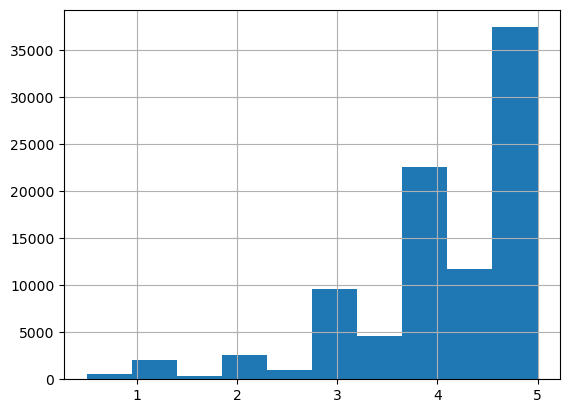

In [36]:
# Let's illustrate the rating distribution as a histogram.
ratings_subset['rating'].hist()

       movieId                       title                    genres
15548    78893  Last Airbender, The (2010)  Action|Adventure|Fantasy
(1341, 4)


<AxesSubplot:>

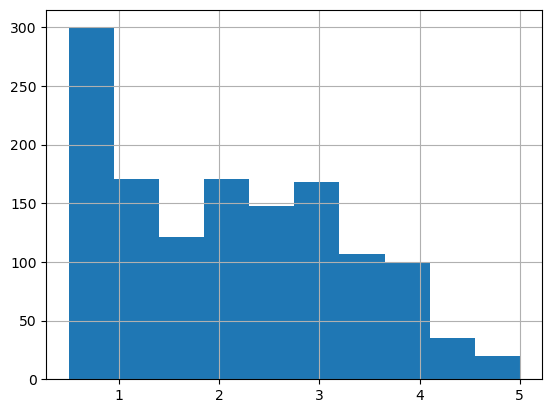

In [37]:
name = "Last Airbender"
result = movies[movies['title'].str.contains(name)]
print(result)

movie_id = 78893
ratings_subset = ratings[ratings['movieId'] == movie_id]
print(ratings_subset.shape)

ratings_subset['rating'].hist()

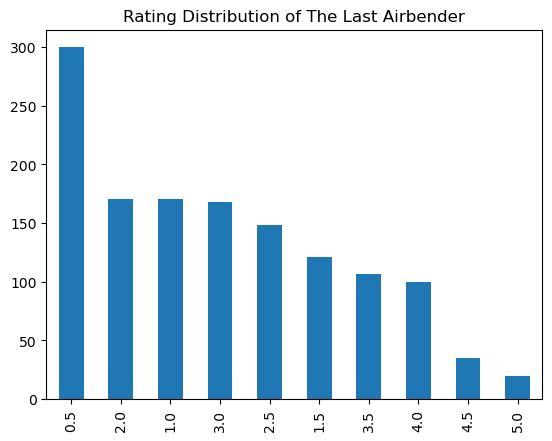

In [42]:
ratings_subset['rating'].value_counts().plot.bar()
plt.title("Rating Distribution of The Last Airbender")
plt.show()

2. Use relevent tags to tell something about the movie.

In [43]:
tags.columns

Index(['tagId', 'tag'], dtype='object')

In [44]:
# This movie looks bad. What can we know about this movie?
scores_subset = scores[scores['movieId'] == movie_id]
print(scores_subset)

          movieId  tagId  relevance
11562000    78893      1    0.04100
11562001    78893      2    0.03175
11562002    78893      3    0.02750
11562003    78893      4    0.03300
11562004    78893      5    0.05375
...           ...    ...        ...
11563123    78893   1124    0.11300
11563124    78893   1125    0.04525
11563125    78893   1126    0.00875
11563126    78893   1127    0.11400
11563127    78893   1128    0.01175

[1128 rows x 3 columns]


In [45]:
scores_subset.sort_values('relevance', ascending=False).merge(tags, on='tagId').head(10)

,movieId,tagId,relevance,tag
0,78893,521,0.95050,horrible
1,78893,111,0.90775,based on a tv show
2,78893,97,0.84125,bad acting
3,78893,377,0.83675,fantasy
4,78893,132,0.82100,big budget
5,78893,951,0.81350,special effects
6,78893,742,0.79225,original
7,78893,100,0.78475,bad plot
8,78893,807,0.77825,predictable
9,78893,406,0.77600,franchise


Let's create a function to do the search.

In [52]:
def get_related_tags(movie_name):
    """
    Given a movie, return the top-10 related movie tags as a data frame.
    """
    movie_record = movies[movies['title'].str.contains(movie_name)]
    row_index = movie_record.index[0]
    movie_id = movie_record.loc[row_index, "movieId"]
    scores_subset = scores[scores['movieId'] == movie_id]
    scores_sorted = scores_subset.sort_values("relevance", ascending=False)
    scores_top10 = scores_sorted.head(10)
    scores_top10 = scores_top10.merge(tags, on="tagId", how="inner")
    return scores_top10

In [54]:
results = get_related_tags("Forrest Gump")
results

,movieId,tagId,relevance,tag
0,356,754,1.00000,oscar (best music - original score)
1,356,752,0.99975,oscar (best effects - visual effects)
2,356,756,0.99150,oscar (best picture)
3,356,751,0.98325,oscar (best editing)
4,356,299,0.97850,destiny
5,356,600,0.97800,life
6,356,536,0.96750,imdb top 250
7,356,750,0.96725,oscar (best directing)
8,356,1035,0.96575,touching
9,356,746,0.95775,oscar (best actor)


3. Find highly rated movies.

In [55]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,307,3.5,1256677221
1,1,481,3.5,1256677456
2,1,1091,1.5,1256677471
3,1,1257,4.5,1256677460
4,1,1449,4.5,1256677264


In [56]:
rating_groups = ratings.groupby('movieId')

In [57]:
# Inspect the ratings in the first group
for key, group in rating_groups:
    print("Key:", key)
    print(group)
    break

Key: 1
          userId  movieId  rating   timestamp
42             4        1     4.0  1113765937
939           10        1     5.0   948885850
1117          14        1     4.5  1442169375
1291          15        1     4.0  1370810063
1869          22        1     4.0  1237622631
...          ...      ...     ...         ...
27752344  283208        1     4.5  1092142493
27752603  283215        1     4.0   854982102
27752688  283217        1     5.0   831280017
27752743  283219        1     4.0  1467480019
27753331  283228        1     4.5  1379882801

[68469 rows x 4 columns]


In [60]:
# Calculate the average rating value in each group.
avg_ratings = rating_groups['rating'].mean().to_frame(name="Average Rating")
avg_ratings.head()

,Average Rating
movieId,
1,3.886649
2,3.246583
3,3.173981
4,2.874540
5,3.077291


In [63]:
# Sort the movies by their average ratings.
avg_ratings.sort_values("Average Rating", ascending=False).head(10)
# The top movies have perfect average rating, probably due to small sample sizes.

,Average Rating
movieId,
169338,5.0
187729,5.0
172149,5.0
160966,5.0
134387,5.0
98437,5.0
134433,5.0
172151,5.0
134605,5.0


In [68]:
# Remove movies that recieve too few ratings 
# Threshold = 10

# Find the number of ratings each movie get.
# ratings['movieId'].value_counts()
num_ratings = ratings.groupby('movieId').size().to_frame("Number of Ratings")
num_ratings.head(10)

,Number of Ratings
movieId,
1,68469
2,27143
3,15585
4,2989
5,15474
6,28683
7,15301
8,1539
9,4449


In [69]:
# Combine average ratings with number of ratings.
movie_data = pd.merge(avg_ratings, num_ratings, left_index=True, right_index=True)
movie_data.head(10)

,Average Rating,Number of Ratings
movieId,,
1,3.886649,68469
2,3.246583,27143
3,3.173981,15585
4,2.874540,2989
5,3.077291,15474
6,3.844211,28683
7,3.371348,15301
8,3.122482,1539
9,3.007530,4449


In [70]:
# A lot of movies only has a single rating
movie_data.sort_values("Number of Ratings").head(20)

,Average Rating,Number of Ratings
movieId,,
159684,2.5,1
152167,2.5,1
27818,3.0,1
152127,5.0,1
152101,3.0,1
152095,3.0,1
152033,3.0,1
152013,3.0,1
151999,1.0,1


In [71]:
# Let's find out how many movies have fewer than 10 ratings.
movies_with_few_ratings = movie_data[movie_data['Number of Ratings'] < 10]
movies_with_few_ratings.shape

(30173, 2)

In [75]:
# Let's remove these movies from movie_data
movie_data = movie_data.drop(movies_with_few_ratings.index, axis=0)

In [80]:
movie_top20 = movie_data.sort_values('Average Rating', ascending=False).head(20)
movie_top20

,Average Rating,Number of Ratings
movieId,,
171705,4.576923,13
171011,4.486518,853
159817,4.458092,1384
318,4.424188,97999
170705,4.399898,984
191999,4.375000,48
174053,4.350559,1074
171495,4.343949,157
172591,4.339667,421


In [81]:
# Add titles to these rows.
pd.merge(movie_top20, movies, left_index=True, right_on="movieId")

,Average Rating,Number of Ratings,movieId,title,genres
48269,4.576923,13,171705,Den radio (2001),(no genres listed)
47937,4.486518,853,171011,Planet Earth II (2016),Documentary
42845,4.458092,1384,159817,Planet Earth (2006),Documentary
315,4.424188,97999,318,"Shawshank Redemption, The (1994)",Crime|Drama
47791,4.399898,984,170705,Band of Brothers (2001),Action|Drama|War
57359,4.375000,48,191999,The Reichenbach Fall (2012),Crime|Drama|Mystery
49411,4.350559,1074,174053,Black Mirror: White Christmas (2014),Drama|Horror|Mystery|Sci-Fi|Thriller
48166,4.343949,157,171495,Cosmos,(no genres listed)
48702,4.339667,421,172591,The Godfather Trilogy: 1972-1990 (1992),(no genres listed)
843,4.332893,60904,858,"Godfather, The (1972)",Crime|Drama


In [85]:
# Some of these movies are not well-known. Let's learn about them
get_related_tags('The Reichenbach Fall')

,movieId,relevance,tagId,tag
